In [54]:
# ruff: noqa: F401, E402
import math
import sys
import time
from bisect import bisect_left, bisect_right
from collections import Counter, deque
from functools import cmp_to_key, lru_cache, reduce
from heapq import heapify, heappop, heappush, heappushpop, nsmallest
from importlib import reload
from itertools import (
    accumulate,
    chain,
    combinations,
    islice,
    pairwise,
    permutations,
    product,
    repeat,
    starmap,
    tee,
)
from math import comb, factorial, log, sqrt
from operator import add, and_, contains, indexOf, itemgetter, neg, or_, xor
from pprint import pprint
from typing import Callable, Iterable, List, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from multiprocess import Process

import arrays
import graphs
import lists
import mathematics
import matrix
import parsing
import search
import sequences
import sets
import stack
import strings
import trees

for m in (
    arrays,
    graphs,
    lists,
    mathematics,
    matrix,
    parsing,
    search,
    sequences,
    sets,
    stack,
    strings,
    trees,
):
    reload(m)


from parsing import format_binop_expression, parse_binop_expression
from sequences import find_if
from stack import IndexStack
from strings import StringView, splint

print()


In [19]:
def sccs(adj):
    sccs, ct, vt = strongly_connected_components(adj)
    print(sccs)
    print(vt)
    print(ct)
    n = len(adj)
    labels = dict(enumerate(zip(range(n), vt, ct)))
    g = nx.DiGraph(dict(enumerate(adj)))
    nx.draw_networkx(
        g,
        labels=labels,
        node_shape="o",
        node_size=800,
        node_color=ct[:n],
        cmap="Set3",
        font_size=6,
    )


In [57]:
def strongly_connected_components(adj: List[List[int]]) -> List[List[int]]:
    ct = [0] * len(adj)  # child/circle time
    vt = ct[:]
    stack = IndexStack()  # SCC nodes on the stack of current DFS descend.
    t = 0  # index time
    sccs = []  # result

    for i in range(len(adj)):
        s1 = [] if ct[i] else [-i - 1]
        while s1:
            n = s1.pop()
            if n >= 0 and n in stack:
                # Second occurrence of `n`.
                ct[n] = reduce(min, (ct[c] for c in adj[n] if c in stack), ct[n])
                if vt[n] == ct[n]:
                    sccs.append(stack.cut_from(n))
                    sccs[-1].sort()
            elif not ct[-n - 1]:
                n = -n - 1
                vt[n] = ct[n] = t = t + 1
                s1.append(n)
                # descend
                s1.extend(-c - 1 for c in adj[n] if not ct[c])
                stack.push(n)
    sccs.sort()
    return sccs, ct, vt


In [53]:
[1, 2, 3, 4, 5].index(3, 2, -1)


2

[[0, 4, 5, 8, 9], [1], [2], [3], [6], [7]]
[1, 8, 9, 6, 5, 4, 3, 10, 2, 7]
[1, 8, 9, 6, 4, 1, 3, 10, 1, 1]


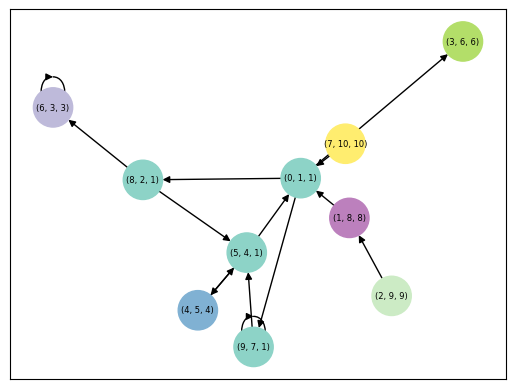

In [61]:
adj = [[9, 3, 8], [0], [1], [], [5], [4, 0], [6], [0], [5, 6], [5, 9]]
sccs(adj)


[[0, 4, 5, 8, 9], [1], [2], [3], [6], [7]]
[1, 8, 9, 6, 5, 4, 3, 10, 2, 7]
[1, 8, 9, 6, 4, 1, 3, 10, 1, 1]


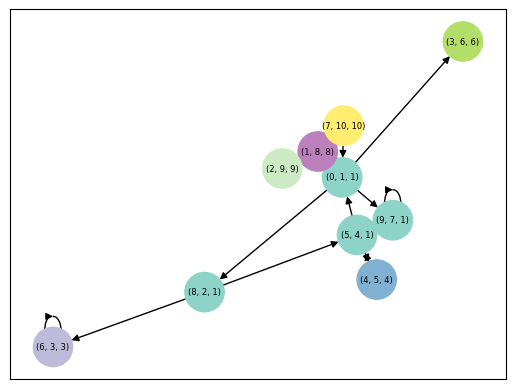

In [60]:
adj = [[9, 3, 8], [0], [1], [], [5], [4, 0], [6], [0], [5, 6], [5, 9]]
sccs(adj)


[[0], [1], [2], [3, 4, 5, 8, 9], [6], [7]]
[1, 2, 9, 3, 7, 6, 5, 10, 4, 8]
[1, 2, 9, 3, 6, 3, 5, 10, 3, 3]


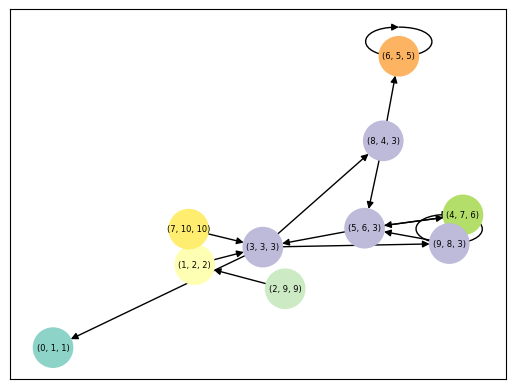

In [59]:
adj = [[], [3], [1], [9, 0, 8], [5], [4, 3], [6], [3], [5, 6], [5, 9]]
sccs(adj)


[[0, 1, 2], [3, 4, 5]]
[1, 2, 6, 3, 4, 5]
[1, 1, 1, 3, 3, 3]


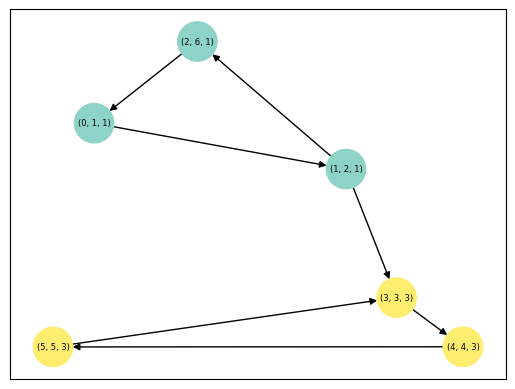

In [58]:
adj = [[1], [2, 3], [0], [4], [5], [3]]
sccs(adj)


[[0, 1, 2, 3]]
[1, 2, 3, 4]
[1, 1, 1, 1]


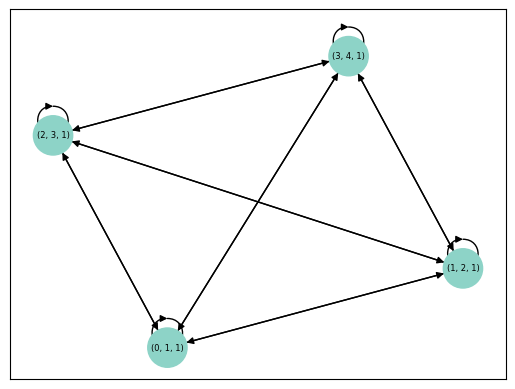

In [51]:
adj = [[3, 2, 1, 0], [3, 2, 1, 0], [3, 2, 1, 0], [3, 2, 1, 0]]
sccs(adj)


[[0, 1, 2, 3, 4, 5]]
[1, 2, 3, 4, 5, 6]
[1, 1, 1, 2, 2, 1]


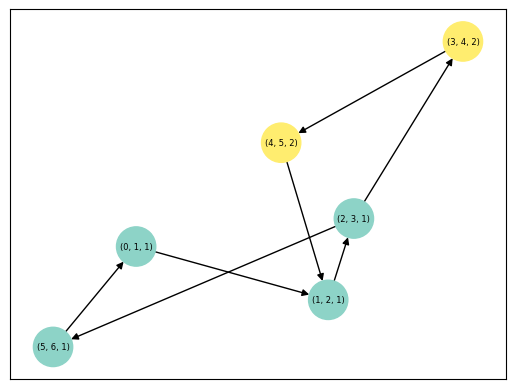

In [62]:
adj = [[1], [2], [5, 3], [4], [1], [0]]
sccs(adj)


[[0, 1, 2, 3, 4]]
[1, 2, 4, 5, 3]
[1, 1, 2, 2, 1]


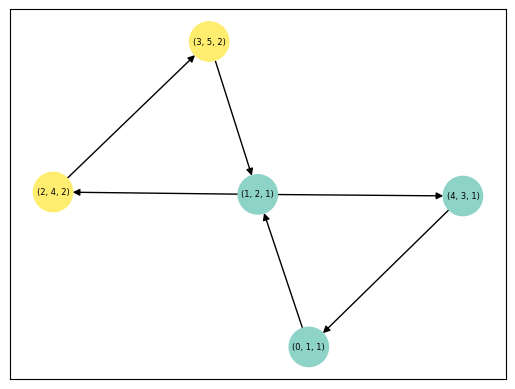

In [63]:
adj = [[1], [2, 4], [3], [1], [0]]
sccs(adj)


[[0], [1, 3, 4, 6, 7], [2], [5]]
[1, 3, 2, 7, 8, 6, 5, 4]
[1, 3, 2, 3, 3, 6, 3, 3]


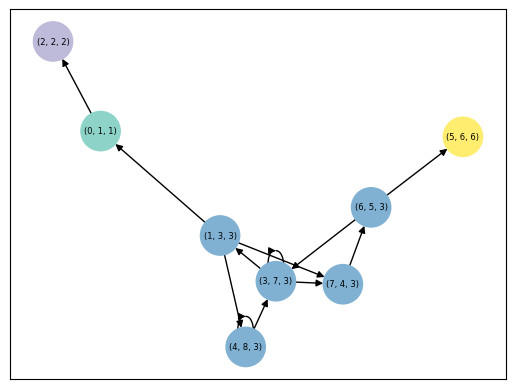

In [65]:
adj = [[2], [4, 7, 0], [], [1, 7, 3], [4, 3], [], [3, 5], [6]]
sccs(adj)


[[0, 1, 2], [3], [4]]
[1, 5, 4, 2, 3]
[1, 1, 1, 2, 3]


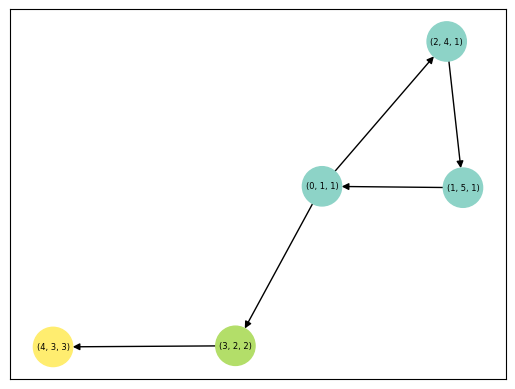

In [66]:
adj = [[2, 3], [0], [1], [4], []]
sccs(adj)
